In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import json
from pandas import json_normalize

import geopandas as gpd
from geopandas import GeoDataFrame

from shapely.geometry import Point

from openaq import OpenAQ

In [24]:
la_bounds_gdf = gpd.read_file("../Data/Inputs/Boundary_Shapefile/City_Boundaries.geojson")

In [25]:
la_bounds_gdf.head()

,OBJECTID,CITY,CITY_ID,CITY_TYPE,CITY_NAME,CITY_LABEL,COLOR_CODE,ABBR,CITY_NO,DESCRIPTN,URL,PHONE,OF_AREA_SM,FEAT_TYPE,COMMENT,COLOR_EGIS,POPULATION,Shape__Area,Shape__Length,geometry
0,47054,None,None,Unincorporated,Unincorporated,CO,1,None,0,UNINC,www.lacounty.gov,2139744321,0.0,Land,None,"Yellow - RGB 255,255,115",None,1.346574e+07,32420.459013,"POLYGON ((-118.29605 34.71835, -118.29714 34.7..."
1,47058,None,None,Unincorporated,Unincorporated,CO,1,None,0,UNINC,www.lacounty.gov,2139744321,0.0,Land,None,"Yellow - RGB 255,255,115",None,4.511299e+04,1060.886854,"POLYGON ((-118.01565 33.97709, -118.01565 33.9..."
2,47062,None,None,Unincorporated,Unincorporated,CO,1,None,0,UNINC,www.lacounty.gov,2139744321,0.0,Land,None,"Yellow - RGB 255,255,115",None,5.820791e+05,5214.656777,"POLYGON ((-117.98616 34.06286, -117.98626 34.0..."
3,47063,None,None,Unincorporated,Unincorporated,CO,1,None,0,UNINC,www.lacounty.gov,2139744321,0.0,Land,None,"Yellow - RGB 255,255,115",None,3.750416e+04,867.784320,"POLYGON ((-117.86325 34.07516, -117.86347 34.0..."
4,47064,None,None,Unincorporated,Unincorporated,CO,1,None,0,UNINC,www.lacounty.gov,2139744321,0.0,Land,None,"Yellow - RGB 255,255,115",None,1.528251e+04,600.356967,"POLYGON ((-118.0823 34.09971, -118.0823 34.099..."


In [26]:
type(la_bounds_gdf)

geopandas.geodataframe.GeoDataFrame

In [27]:
la_bounds_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

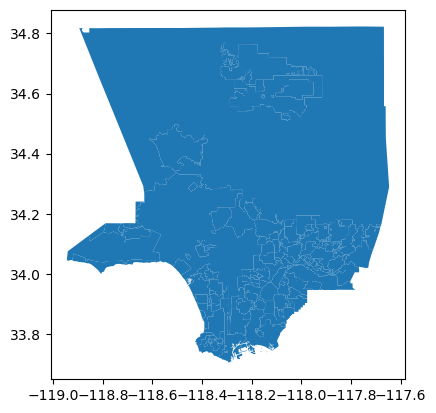

In [28]:
la_bounds_gdf.plot();

In [29]:
bbox = list(la_bounds_gdf.total_bounds)
bbox

[np.float64(-118.944703049253),
 np.float64(33.7046743723892),
 np.float64(-117.646385981235),
 np.float64(34.823304156602)]

In [30]:
bbox[1]

np.float64(33.7046743723892)

In [31]:
client = OpenAQ(api_key='a54a2a8bdc813b4c938b45b3c9bea90f7054cfbdfaa26e8c7709b510bf9b3c7c')
response = client.locations.list(
    bbox=bbox,
    limit=1000
)
data = response.dict()
stations_df = json_normalize(data['results'])

In [32]:
stations_df.head()

,id,name,locality,timezone,is_mobile,is_monitor,instruments,sensors,bounds,distance,...,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_first.local,datetime_last.utc,datetime_last.local,datetime_first,datetime_last
0,847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",None,...,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2022-05-05T22:00:00Z,2022-05-05T15:00:00-07:00,NaN,NaN
1,1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",None,...,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN
2,1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,...,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN
3,1042,Piru - Pacific,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",None,...,119,AirNow,34.404400,-118.810000,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2020-06-10T21:00:00Z,2020-06-10T14:00:00-07:00,NaN,NaN
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",None,...,119,AirNow,34.066700,-117.750600,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2025-11-09T18:00:00Z,2025-11-09T10:00:00-08:00,NaN,NaN


In [33]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     433 non-null    int64  
 1   name                   433 non-null    object 
 2   locality               38 non-null     object 
 3   timezone               433 non-null    object 
 4   is_mobile              433 non-null    bool   
 5   is_monitor             433 non-null    bool   
 6   instruments            433 non-null    object 
 7   sensors                433 non-null    object 
 8   bounds                 433 non-null    object 
 9   distance               0 non-null      object 
 10  country.id             433 non-null    int64  
 11  country.code           433 non-null    object 
 12  country.name           433 non-null    object 
 13  owner.id               433 non-null    int64  
 14  owner.name             433 non-null    object 
 15  provid

### Converting into a GDF

https://gis.stackexchange.com/questions/174159/converting-pandas-dataframe-to-geodataframe

In [35]:
geometry = [Point(xy) for xy in zip(stations_df['coordinates.longitude'], stations_df['coordinates.latitude'])]
stations_gdf = GeoDataFrame(stations_df, crs="EPSG:4326", geometry=geometry)

In [36]:
stations_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     433 non-null    int64   
 1   name                   433 non-null    object  
 2   locality               38 non-null     object  
 3   timezone               433 non-null    object  
 4   is_mobile              433 non-null    bool    
 5   is_monitor             433 non-null    bool    
 6   instruments            433 non-null    object  
 7   sensors                433 non-null    object  
 8   bounds                 433 non-null    object  
 9   distance               0 non-null      object  
 10  country.id             433 non-null    int64   
 11  country.code           433 non-null    object  
 12  country.name           433 non-null    object  
 13  owner.id               433 non-null    int64   
 14  owner.name             433 non-nul

In [37]:
stations_gdf.head()

,id,name,locality,timezone,is_mobile,is_monitor,instruments,sensors,bounds,distance,...,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_first.local,datetime_last.utc,datetime_last.local,datetime_first,datetime_last,geometry
0,847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",None,...,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2022-05-05T22:00:00Z,2022-05-05T15:00:00-07:00,NaN,NaN,POINT (-118.17528 33.79222)
1,1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",None,...,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN,POINT (-118.1081 34.0833)
2,1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",None,...,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2016-11-09T21:00:00Z,2016-11-09T13:00:00-08:00,NaN,NaN,POINT (-118.0592 34.0131)
3,1042,Piru - Pacific,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",None,...,AirNow,34.404400,-118.810000,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2020-06-10T21:00:00Z,2020-06-10T14:00:00-07:00,NaN,NaN,POINT (-118.81 34.4044)
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",None,...,AirNow,34.066700,-117.750600,2016-03-06T20:00:00Z,2016-03-06T12:00:00-08:00,2025-11-09T18:00:00Z,2025-11-09T10:00:00-08:00,NaN,NaN,POINT (-117.7506 34.0667)


Verifying there are recent entries:

In [38]:
stations_gdf.sort_values(by='datetime_last.local',ascending=False)[['id','name','datetime_last.local']].head()

,id,name,datetime_last.local
206,947281,Amestoy ES (2096),2025-11-09T10:07:10-08:00
249,947324,Wonderland ES (7849),2025-11-09T10:07:06-08:00
146,947221,Elizabeth Learning Ctr (3548),2025-11-09T10:07:05-08:00
122,947197,Garfield HS/Monterey CHS (8677),2025-11-09T10:07:05-08:00
251,947326,President ES (6148),2025-11-09T10:07:02-08:00


## Cleaning the dataset

The datetime_first, datetime_last and distance features are all 100% null, so I will drop them:

In [39]:
stations_gdf.drop(['distance', 'datetime_first', 'datetime_last'], axis=1, inplace=True)

Since the entire dataset is within the same timezone, I'll also drop the local datetime features:

In [40]:
stations_gdf.drop(['datetime_first.local', 'datetime_last.local'], axis=1, inplace=True)

In [41]:
stations_gdf.head()

,id,name,locality,timezone,is_mobile,is_monitor,instruments,sensors,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry
0,847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2022-05-05T22:00:00Z,POINT (-118.17528 33.79222)
1,1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-11-09T21:00:00Z,POINT (-118.1081 34.0833)
2,1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-11-09T21:00:00Z,POINT (-118.0592 34.0131)
3,1042,Piru - Pacific,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,2016-03-06T20:00:00Z,2020-06-10T21:00:00Z,POINT (-118.81 34.4044)
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06T20:00:00Z,2025-11-09T18:00:00Z,POINT (-117.7506 34.0667)


Many of the remaining features will likely not be useful, but I'll keep them for now just in case

### Nested features

We have three nested features: `instruments`, `sensors` and `bounds`

#### Nested `sensors` feature

In [42]:
stations_gdf.head()

,id,name,locality,timezone,is_mobile,is_monitor,instruments,sensors,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry
0,847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1502, 'name': 'pm25 µg/m³', 'parameter...","[-118.175278, 33.792221, -118.175278, 33.792221]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2022-05-05T22:00:00Z,POINT (-118.17528 33.79222)
1,1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1837, 'name': 'o3 ppm', 'parameter': {...","[-118.1081, 34.0833, -118.1081, 34.0833]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-11-09T21:00:00Z,POINT (-118.1081 34.0833)
2,1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1866, 'name': 'o3 ppm', 'parameter': {...","[-118.059196, 34.0131, -118.059196, 34.0131]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-11-09T21:00:00Z,POINT (-118.0592 34.0131)
3,1042,Piru - Pacific,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 1876, 'name': 'o3 ppm', 'parameter': {...","[-118.81, 34.4044, -118.81, 34.4044]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,2016-03-06T20:00:00Z,2020-06-10T21:00:00Z,POINT (-118.81 34.4044)
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","[{'id': 25500, 'name': 'co ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06T20:00:00Z,2025-11-09T18:00:00Z,POINT (-117.7506 34.0667)


In [43]:
stations_gdf.iloc[4]

id                                                                    1052
name                                                                Pomona
locality                                  Los Angeles-Long Beach-Santa Ana
timezone                                               America/Los_Angeles
is_mobile                                                            False
is_monitor                                                            True
instruments                      [{'id': 2, 'name': 'Government Monitor'}]
sensors                  [{'id': 25500, 'name': 'co ppm', 'parameter': ...
bounds                            [-117.7506, 34.0667, -117.7506, 34.0667]
country.id                                                             155
country.code                                                            US
country.name                                                 United States
owner.id                                                                 4
owner.name               

In [44]:
stations_gdf.iloc[4]['sensors']

[{'id': 25500,
  'name': 'co ppm',
  'parameter': {'id': 8, 'name': 'co', 'units': 'ppm', 'display_name': 'CO'}},
 {'id': 4272146,
  'name': 'no ppm',
  'parameter': {'id': 35, 'name': 'no', 'units': 'ppm', 'display_name': 'NO'}},
 {'id': 25501,
  'name': 'no2 ppm',
  'parameter': {'id': 7,
   'name': 'no2',
   'units': 'ppm',
   'display_name': 'NO₂'}},
 {'id': 4272073,
  'name': 'nox ppm',
  'parameter': {'id': 19840,
   'name': 'nox',
   'units': 'ppm',
   'display_name': 'NOx'}},
 {'id': 1888,
  'name': 'o3 ppm',
  'parameter': {'id': 10, 'name': 'o3', 'units': 'ppm', 'display_name': 'O₃'}}]

Each station has multiple sensors: this station (`id = 1052`) has 5 sensors for 5 different pollutant classes. Each sensor has its own id.

Within each sensor instance is a sub-nested field for parameter data:

In [45]:
stations_gdf.iloc[4]['sensors'][0]['parameter']

{'id': 8, 'name': 'co', 'units': 'ppm', 'display_name': 'CO'}

In [46]:
stations_gdf.iloc[5]['sensors'][0]['parameter']

{'id': 8, 'name': 'co', 'units': 'ppm', 'display_name': 'CO'}

The parameter id is related to the pollutant type. All this information is already contained with the `name` feature within the sensor data:

In [47]:
stations_gdf.iloc[4]['sensors'][0]

{'id': 25500,
 'name': 'co ppm',
 'parameter': {'id': 8, 'name': 'co', 'units': 'ppm', 'display_name': 'CO'}}

Keeping the display name could be useful for mapping - I'll pull that out and drop the nested parameter feature.

In [48]:
stations_gdf.iloc[4]['sensors'][0]['name']

'co ppm'

In [49]:
stations_gdf.iloc[4]['sensors'][0]['parameter']['display_name']

'CO'

In [50]:
explode_test = stations_gdf.explode('sensors')

Examining rows which match the station id for the station we were looking at above:

In [51]:
explode_test[explode_test['id']==1052]

,id,name,locality,timezone,is_mobile,is_monitor,instruments,sensors,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 25500, 'name': 'co ppm', 'parameter': {...","[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,2016-03-06T20:00:00Z,2025-11-09T18:00:00Z,POINT (-117.7506 34.0667)
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 4272146, 'name': 'no ppm', 'parameter':...","[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,2016-03-06T20:00:00Z,2025-11-09T18:00:00Z,POINT (-117.7506 34.0667)
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 25501, 'name': 'no2 ppm', 'parameter': ...","[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,2016-03-06T20:00:00Z,2025-11-09T18:00:00Z,POINT (-117.7506 34.0667)
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 4272073, 'name': 'nox ppm', 'parameter'...","[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,2016-03-06T20:00:00Z,2025-11-09T18:00:00Z,POINT (-117.7506 34.0667)
4,1052,Pomona,Los Angeles-Long Beach-Santa Ana,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 1888, 'name': 'o3 ppm', 'parameter': {'...","[-117.7506, 34.0667, -117.7506, 34.0667]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.0667,-117.7506,2016-03-06T20:00:00Z,2025-11-09T18:00:00Z,POINT (-117.7506 34.0667)


I'll rename the `id` column to specify that it's the station id, and create a new column for the sensor id, sensor type, and display name:

In [52]:
explode_test.rename(columns={'id':'station_id'},inplace=True)

In [53]:
explode_test.head(3)

,station_id,name,locality,timezone,is_mobile,is_monitor,instruments,sensors,bounds,country.id,...,country.name,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry
0,847,South Long Beach,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 1502, 'name': 'pm25 µg/m³', 'parameter'...","[-118.175278, 33.792221, -118.175278, 33.792221]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2022-05-05T22:00:00Z,POINT (-118.17528 33.79222)
1,1019,Pasadena,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 1837, 'name': 'o3 ppm', 'parameter': {'...","[-118.1081, 34.0833, -118.1081, 34.0833]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-11-09T21:00:00Z,POINT (-118.1081 34.0833)
2,1036,Pico Rivera,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 1866, 'name': 'o3 ppm', 'parameter': {'...","[-118.059196, 34.0131, -118.059196, 34.0131]",155,...,United States,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-11-09T21:00:00Z,POINT (-118.0592 34.0131)


Adding sensor type feature:

In [54]:
explode_test['sensor_type'] = [explode_test.iloc[i]['sensors']['name'] for i in range(len(explode_test))]

Adding sensor id feature:

In [55]:
explode_test['sensor_id'] = [explode_test.iloc[i]['sensors']['id'] for i in range(len(explode_test))]

Adding a sensor display name feature to make map labels neater:

In [56]:
explode_test['sensor_display_name'] = [explode_test.iloc[i]['sensors']['parameter']['display_name'] for i in range(len(explode_test))]

Reordering the columns to make it easier to see the pollutant type:

https://stackoverflow.com/questions/53141240/pandas-how-to-swap-or-reorder-columns

In [57]:
cols = ['station_id','name','sensor_id','sensor_display_name']
explode_test = explode_test[cols + [c for c in explode_test.columns if c not in cols]]

In [58]:
explode_test.head(3)

,station_id,name,sensor_id,sensor_display_name,locality,timezone,is_mobile,is_monitor,instruments,sensors,...,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
0,847,South Long Beach,1502,PM2.5,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 1502, 'name': 'pm25 µg/m³', 'parameter'...",...,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06T20:00:00Z,2022-05-05T22:00:00Z,POINT (-118.17528 33.79222),pm25 µg/m³
1,1019,Pasadena,1837,O₃,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 1837, 'name': 'o3 ppm', 'parameter': {'...",...,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06T20:00:00Z,2016-11-09T21:00:00Z,POINT (-118.1081 34.0833),o3 ppm
2,1036,Pico Rivera,1866,O₃,None,America/Los_Angeles,False,True,"[{'id': 2, 'name': 'Government Monitor'}]","{'id': 1866, 'name': 'o3 ppm', 'parameter': {'...",...,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06T20:00:00Z,2016-11-09T21:00:00Z,POINT (-118.0592 34.0131),o3 ppm


Creating a checkpoint:

In [59]:
explode_test.to_file("../Data/Outputs/01_sensors_explode_test.geojson", driver="GeoJSON")

#### Dropping the old sensors feature and committing to sensors_gdf

In [60]:
sensors_gdf = explode_test.drop(columns=['sensors'])

Now that relevant data has been extracted, I can drop `sensors`. I'll also commit back to the old gdf:

### Converting datetime features to datetime

In [61]:
sensors_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1975 entries, 0 to 432
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   station_id             1975 non-null   int64   
 1   name                   1975 non-null   object  
 2   sensor_id              1975 non-null   int64   
 3   sensor_display_name    1975 non-null   object  
 4   locality               143 non-null    object  
 5   timezone               1975 non-null   object  
 6   is_mobile              1975 non-null   bool    
 7   is_monitor             1975 non-null   bool    
 8   instruments            1975 non-null   object  
 9   bounds                 1975 non-null   object  
 10  country.id             1975 non-null   int64   
 11  country.code           1975 non-null   object  
 12  country.name           1975 non-null   object  
 13  owner.id               1975 non-null   int64   
 14  owner.name             1975 non-null  

The two datetime features are being handled as objects, so I will convert to datetimes:

In [62]:
sensors_gdf['datetime_first.utc'] = pd.to_datetime(sensors_gdf['datetime_first.utc'])

In [63]:
sensors_gdf['datetime_last.utc'] = pd.to_datetime(sensors_gdf['datetime_last.utc'])

In [64]:
sensors_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1975 entries, 0 to 432
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   station_id             1975 non-null   int64              
 1   name                   1975 non-null   object             
 2   sensor_id              1975 non-null   int64              
 3   sensor_display_name    1975 non-null   object             
 4   locality               143 non-null    object             
 5   timezone               1975 non-null   object             
 6   is_mobile              1975 non-null   bool               
 7   is_monitor             1975 non-null   bool               
 8   instruments            1975 non-null   object             
 9   bounds                 1975 non-null   object             
 10  country.id             1975 non-null   int64              
 11  country.code           1975 non-null   object         

### Handling nested `instruments` and `bounds` features

For my purposes, I do not think the `instruments` feature will contain any useful information:

In [65]:
sensors_gdf.iloc[4]['instruments']

[{'id': 2, 'name': 'Government Monitor'}]

In [66]:
sensors_gdf.drop(columns=['instruments'],inplace=True)

The nested bounds feature is redundant. Our data is point-based, and it's just confirming that we have one-dimensional shapes at the coordinates provided.

In [67]:
sensors_gdf.iloc[4]['bounds']

[-118.81, 34.4044, -118.81, 34.4044]

In [68]:
print(sensors_gdf.iloc[4]['coordinates.latitude'])
print(sensors_gdf.iloc[4]['coordinates.longitude'])

34.4044
-118.81


In [69]:
sensors_gdf.drop(columns=['bounds'],inplace=True)

In [70]:
sensors_gdf.head(3)

,station_id,name,sensor_id,sensor_display_name,locality,timezone,is_mobile,is_monitor,country.id,country.code,...,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
0,847,South Long Beach,1502,PM2.5,None,America/Los_Angeles,False,True,155,US,...,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06 20:00:00+00:00,2022-05-05 22:00:00+00:00,POINT (-118.17528 33.79222),pm25 µg/m³
1,1019,Pasadena,1837,O₃,None,America/Los_Angeles,False,True,155,US,...,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,POINT (-118.1081 34.0833),o3 ppm
2,1036,Pico Rivera,1866,O₃,None,America/Los_Angeles,False,True,155,US,...,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,POINT (-118.0592 34.0131),o3 ppm


In [71]:
sensors_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1975 entries, 0 to 432
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   station_id             1975 non-null   int64              
 1   name                   1975 non-null   object             
 2   sensor_id              1975 non-null   int64              
 3   sensor_display_name    1975 non-null   object             
 4   locality               143 non-null    object             
 5   timezone               1975 non-null   object             
 6   is_mobile              1975 non-null   bool               
 7   is_monitor             1975 non-null   bool               
 8   country.id             1975 non-null   int64              
 9   country.code           1975 non-null   object             
 10  country.name           1975 non-null   object             
 11  owner.id               1975 non-null   int64          

The dataset is now mostly cleaned - I will briefly examine the locality feature, which has many nulls:

In [72]:
sensors_gdf.locality.unique()

array([None, 'Los Angeles-Long Beach-Santa Ana', 'SC0', 'LOS ANGELES',
       'Oxnard-Thousand Oaks-Ventura', 'ORANGE', 'CA8 - ARB'],
      dtype=object)

As this feature is largely null, I think it's reasonable to just drop it:

In [73]:
sensors_gdf.drop(columns=['locality'],inplace=True)

In [74]:
sensors_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1975 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   station_id             1975 non-null   int64              
 1   name                   1975 non-null   object             
 2   sensor_id              1975 non-null   int64              
 3   sensor_display_name    1975 non-null   object             
 4   timezone               1975 non-null   object             
 5   is_mobile              1975 non-null   bool               
 6   is_monitor             1975 non-null   bool               
 7   country.id             1975 non-null   int64              
 8   country.code           1975 non-null   object             
 9   country.name           1975 non-null   object             
 10  owner.id               1975 non-null   int64              
 11  owner.name             1975 non-null   object         

Many of these features e.g. `country.code`, `country.name` are unlikely to be useful - we know we are working with a US-based dataset. I'll drop them just to make the dataset more convenient to work with

In [75]:
print(sensors_gdf['country.code'].unique())
print(sensors_gdf['country.id'].unique())
print(sensors_gdf['country.name'].unique())

['US']
[155]
['United States']


In [76]:
sensors_gdf.drop(columns=['country.code','country.id','country.name'],inplace=True)

## Examining Pollutant Classes

Now that we have done some basic data cleaning, I will do EDA on the polluant classes present:

In [77]:
sensors_gdf.head(2)

,station_id,name,sensor_id,sensor_display_name,timezone,is_mobile,is_monitor,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
0,847,South Long Beach,1502,PM2.5,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06 20:00:00+00:00,2022-05-05 22:00:00+00:00,POINT (-118.17528 33.79222),pm25 µg/m³
1,1019,Pasadena,1837,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,POINT (-118.1081 34.0833),o3 ppm


In [78]:
sensors_gdf['sensor_type'].unique()

array(['pm25 µg/m³', 'o3 ppm', 'co ppm', 'no ppm', 'no2 ppm', 'nox ppm',
       'pm10 µg/m³', 'so2 ppm', 'pm1 µg/m³', 'temperature f',
       'temperature c', 'relativehumidity %', 'um003 particles/cm³',
       'no2 ppb'], dtype=object)

In [79]:
sensors_gdf['sensor_display_name'].unique()

array(['PM2.5', 'O₃', 'CO', 'NO', 'NO₂', 'NOx', 'PM10', 'SO₂', 'PM1',
       'Temperature (F)', 'Temperature (C)', 'RH', 'PM0.3 count'],
      dtype=object)

In [80]:
np.round(sensors_gdf['sensor_display_name'].value_counts(normalize=True)*100,1)

sensor_display_name
PM2.5              21.0
PM1                17.1
PM10               15.4
Temperature (C)    15.1
Temperature (F)    11.1
RH                  8.0
PM0.3 count         3.9
NO₂                 3.5
O₃                  1.9
NO                  0.9
NOx                 0.9
CO                  0.9
SO₂                 0.2
Name: proportion, dtype: float64

In [81]:
np.round(sensors_gdf['sensor_display_name'].value_counts())

sensor_display_name
PM2.5              415
PM1                338
PM10               304
Temperature (C)    299
Temperature (F)    219
RH                 158
PM0.3 count         78
NO₂                 69
O₃                  38
NO                  18
NOx                 18
CO                  17
SO₂                  4
Name: count, dtype: int64

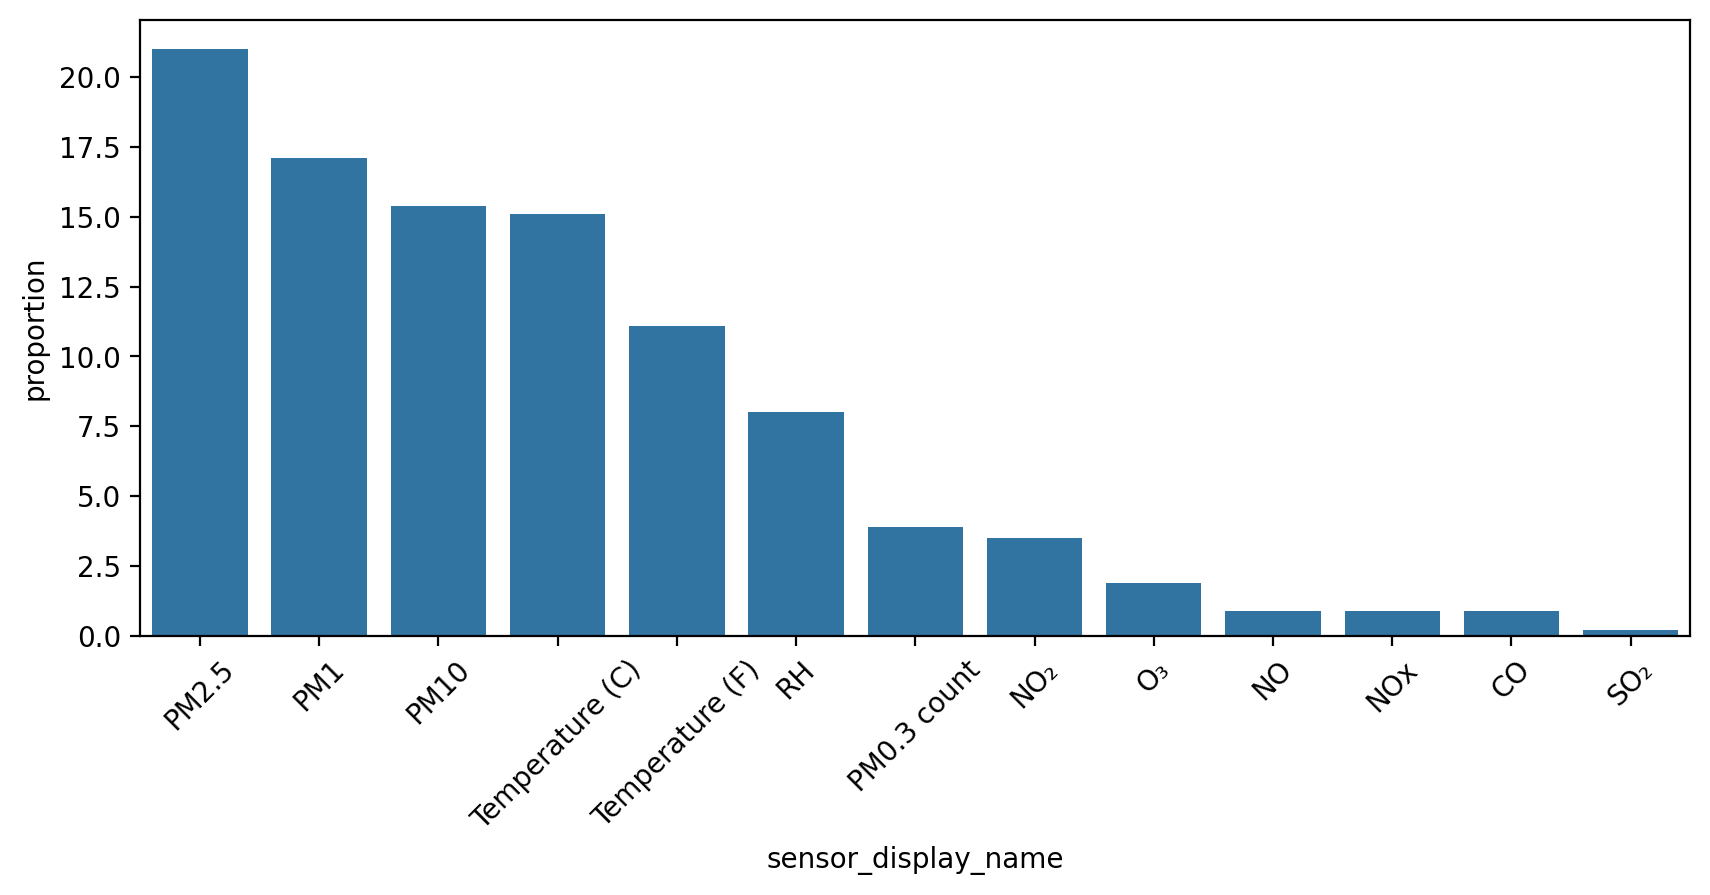

In [82]:
plt.figure(figsize=(10,4),dpi=200);
sns.barplot(np.round(sensors_gdf['sensor_display_name'].value_counts(normalize=True)*100,1));
plt.xticks(rotation=45);

The general particulate matter readings are the most common - specific pollutant classes e.g. ozone, nitrogen dioxide are far less common.

For the sake of creating a pollution map, `PM2.5` would be the best - if there's any missing data, it may be possible to impute from `PM1` or `PM10`.

In [83]:
sensors_gdf['sensor_display_name'].isna().sum()

np.int64(0)

The above null check actually tells us basically nothing - it indicates that no stations have completly missing data over all time.

A station with a single NO2 sensor reading from 2015 would allow the entire station to pass the test.

In [84]:
sensors_gdf[:10]

,station_id,name,sensor_id,sensor_display_name,timezone,is_mobile,is_monitor,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
0,847,South Long Beach,1502,PM2.5,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06 20:00:00+00:00,2022-05-05 22:00:00+00:00,POINT (-118.17528 33.79222),pm25 µg/m³
1,1019,Pasadena,1837,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.083300,-118.108100,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,POINT (-118.1081 34.0833),o3 ppm
2,1036,Pico Rivera,1866,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.013100,-118.059196,2016-03-06 20:00:00+00:00,2016-11-09 21:00:00+00:00,POINT (-118.0592 34.0131),o3 ppm
3,1042,Piru - Pacific,1876,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,2016-03-06 20:00:00+00:00,2020-06-10 21:00:00+00:00,POINT (-118.81 34.4044),o3 ppm
3,1042,Piru - Pacific,22301,PM2.5,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,2016-03-06 20:00:00+00:00,2020-06-10 21:00:00+00:00,POINT (-118.81 34.4044),pm25 µg/m³
4,1052,Pomona,25500,CO,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06 20:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-117.7506 34.0667),co ppm
4,1052,Pomona,4272146,NO,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06 20:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-117.7506 34.0667),no ppm
4,1052,Pomona,25501,NO₂,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06 20:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-117.7506 34.0667),no2 ppm
4,1052,Pomona,4272073,NOx,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06 20:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-117.7506 34.0667),nox ppm
4,1052,Pomona,1888,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.066700,-117.750600,2016-03-06 20:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-117.7506 34.0667),o3 ppm


Stations with `PM2.5` readings:

In [85]:
len(sensors_gdf[sensors_gdf['sensor_display_name'] == "PM2.5"])

415

The number of stations present:

In [86]:
len(set(sensors_gdf['station_id']))

433

In [87]:
len(sensors_gdf[sensors_gdf['sensor_display_name'] == "PM2.5"])/len(set(sensors_gdf['station_id']))*100

95.84295612009238

The `PM2.5` pollutant class has 96% non-null, but this still only indicates that 96% of stations have *at least one* `PM2.5` reading from the entire historical record.

In [88]:
pd.DataFrame(index=[sensors_gdf['sensor_display_name'].unique()], data=[np.round(len(sensors_gdf[sensors_gdf['sensor_display_name'] == pollutant])/len(set(sensors_gdf['station_id']))*100,2) for pollutant in sensors_gdf['sensor_display_name'].unique()],columns=['% of stations with pollutant sensor type']).sort_values(by='% of stations with pollutant sensor type',ascending=False)

,% of stations with pollutant sensor type
PM2.5,95.84
PM1,78.06
PM10,70.21
Temperature (C),69.05
Temperature (F),50.58
RH,36.49
PM0.3 count,18.01
NO₂,15.94
O₃,8.78
NO,4.16


I will now examine which stations do not have PM2.5 readings:

In [89]:
no_pm2_5 = list(set(sensors_gdf['station_id']) - set(sensors_gdf[sensors_gdf['sensor_display_name'] == 'PM2.5']['station_id']))
no_pm2_5

[1410,
 5026276,
 8868,
 8904,
 8874,
 1036,
 46221,
 1326,
 8657,
 1564,
 1268,
 8661,
 32632,
 8730,
 1019,
 1052,
 8733,
 1247]

#### Examining a few stations with no PM2.5 data:

In [90]:
sensors_gdf[sensors_gdf['station_id'] == 1410]

,station_id,name,sensor_id,sensor_display_name,timezone,is_mobile,is_monitor,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
10,1410,West Los Angeles - V,15732,CO,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.0506,-118.4553,2016-03-06 20:00:00+00:00,2018-06-08 15:00:00+00:00,POINT (-118.4553 34.0506),co ppm
10,1410,West Los Angeles - V,15733,NO₂,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.0506,-118.4553,2016-03-06 20:00:00+00:00,2018-06-08 15:00:00+00:00,POINT (-118.4553 34.0506),no2 ppm
10,1410,West Los Angeles - V,2517,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.0506,-118.4553,2016-03-06 20:00:00+00:00,2018-06-08 15:00:00+00:00,POINT (-118.4553 34.0506),o3 ppm


In [91]:
sensors_gdf[sensors_gdf['station_id'] == 8657]

,station_id,name,sensor_id,sensor_display_name,timezone,is_mobile,is_monitor,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
24,8657,LAX-Hastings,25109,CO,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,33.95507,-118.43046,2016-11-14 18:00:00+00:00,2021-09-16 15:00:00+00:00,POINT (-118.43046 33.95507),co ppm
24,8657,LAX-Hastings,25110,NO₂,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,33.95507,-118.43046,2016-11-14 18:00:00+00:00,2021-09-16 15:00:00+00:00,POINT (-118.43046 33.95507),no2 ppm
24,8657,LAX-Hastings,25111,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,33.95507,-118.43046,2016-11-14 18:00:00+00:00,2021-09-16 15:00:00+00:00,POINT (-118.43046 33.95507),o3 ppm
24,8657,LAX-Hastings,25112,SO₂,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,33.95507,-118.43046,2016-11-14 18:00:00+00:00,2021-09-16 15:00:00+00:00,POINT (-118.43046 33.95507),so2 ppm


In [92]:
sensors_gdf[sensors_gdf['station_id'] == 8733]

,station_id,name,sensor_id,sensor_display_name,timezone,is_mobile,is_monitor,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
28,8733,Pico Rivera,25479,CO,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.010283,-118.068484,2016-11-14 18:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-118.06848 34.01028),co ppm
28,8733,Pico Rivera,4272841,NO,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.010283,-118.068484,2016-11-14 18:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-118.06848 34.01028),no ppm
28,8733,Pico Rivera,25480,NO₂,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.010283,-118.068484,2016-11-14 18:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-118.06848 34.01028),no2 ppm
28,8733,Pico Rivera,4272984,NOx,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.010283,-118.068484,2016-11-14 18:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-118.06848 34.01028),nox ppm
28,8733,Pico Rivera,25481,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.010283,-118.068484,2016-11-14 18:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-118.06848 34.01028),o3 ppm


In [93]:
sensors_gdf[sensors_gdf['station_id'] == 8868]

,station_id,name,sensor_id,sensor_display_name,timezone,is_mobile,is_monitor,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
31,8868,Azusa,25887,CO,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.136474,-117.923963,2016-11-14 18:00:00+00:00,2022-10-04 15:00:00+00:00,POINT (-117.92396 34.13647),co ppm
31,8868,Azusa,25886,NO₂,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.136474,-117.923963,2016-11-14 18:00:00+00:00,2022-10-04 15:00:00+00:00,POINT (-117.92396 34.13647),no2 ppm
31,8868,Azusa,25885,O₃,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.136474,-117.923963,2016-11-14 18:00:00+00:00,2022-10-04 15:00:00+00:00,POINT (-117.92396 34.13647),o3 ppm


None of these examples contain any `PM1` or `PM10` readings - it would be impossible to directly impute the missing `PM2.5` data. 

When it comes time to creating a list of stations with active `PM2.5` readings, I will simply discard these as there's nothing we can do with them.

## Examining the freshness of PM2.5 readings

We've seen that 96% of stations have *some* `PM2.5` readings, but this doesn't guarantee the readings are recent.

In [94]:
pm2_5 = sensors_gdf[sensors_gdf['sensor_display_name'] == 'PM2.5']
pm2_5.head()

,station_id,name,sensor_id,sensor_display_name,timezone,is_mobile,is_monitor,owner.id,owner.name,provider.id,provider.name,coordinates.latitude,coordinates.longitude,datetime_first.utc,datetime_last.utc,geometry,sensor_type
0,847,South Long Beach,1502,PM2.5,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,33.792221,-118.175278,2016-03-06 20:00:00+00:00,2022-05-05 22:00:00+00:00,POINT (-118.17528 33.79222),pm25 µg/m³
3,1042,Piru - Pacific,22301,PM2.5,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.404400,-118.810000,2016-03-06 20:00:00+00:00,2020-06-10 21:00:00+00:00,POINT (-118.81 34.4044),pm25 µg/m³
5,1200,Glendora - Laurel,2150,PM2.5,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.143900,-117.850800,2016-03-06 20:00:00+00:00,2025-11-09 18:00:00+00:00,POINT (-117.8508 34.1439),pm25 µg/m³
8,1310,Lancaster-Division,2362,PM2.5,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.669589,-118.130689,2016-03-30 06:00:00+00:00,2022-10-04 18:00:00+00:00,POINT (-118.13069 34.66959),pm25 µg/m³
12,1575,Los Angeles - N. Mai,2775,PM2.5,America/Los_Angeles,False,True,4,Unknown Governmental Organization,119,AirNow,34.066900,-118.241700,2016-03-06 20:00:00+00:00,2017-06-07 21:00:00+00:00,POINT (-118.2417 34.0669),pm25 µg/m³


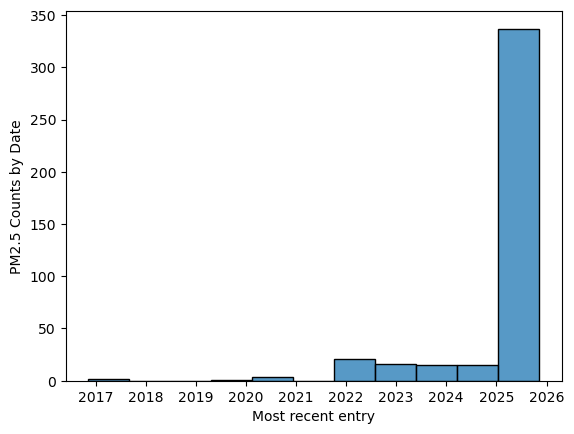

In [95]:
plt.plot(figsize=(8,2),dpi=200)
sns.histplot(data=pm2_5, x='datetime_last.utc', bins=11);
plt.ylabel('PM2.5 Counts by Date');
plt.xlabel('Most recent entry');

The vast majority of stations which have PM2.5 readings are active, and have posted readings since the start of 2025.

## Athena Discussion

As noted, the actual data is not found within this dataset - this is merely metadata about what kind of sensor readings each station has, and how modern its readings are.

In order to access the actual readings, I need to access the OpenAQ S3 bucket via Athena. I will create a script in another notebook which can generate a list of `station_id`s for stations that have posted `PM2.5` readings in the past e.g. week.

The same script can then use Athena to pull only the relevant data from S3, which should help with cost/efficency.

For the purposes of building an initial Athena database, I'll save to .csv so I can work in another notebook

In [96]:
pm2_5.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 415 entries, 0 to 432
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   station_id             415 non-null    int64              
 1   name                   415 non-null    object             
 2   sensor_id              415 non-null    int64              
 3   sensor_display_name    415 non-null    object             
 4   timezone               415 non-null    object             
 5   is_mobile              415 non-null    bool               
 6   is_monitor             415 non-null    bool               
 7   owner.id               415 non-null    int64              
 8   owner.name             415 non-null    object             
 9   provider.id            415 non-null    int64              
 10  provider.name          415 non-null    object             
 11  coordinates.latitude   415 non-null    float64         

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html

In [97]:
pm2_5.to_file('../Data/Outputs/pm25.geojson', driver='GeoJSON')